# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [109]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [110]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | suez
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | aasiaat
Processing Record 4 of Set 1 | dryden
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | sitia
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | remire-montjoly
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | constantia
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | rio rico
Processing Record 17 of Set 1 | muisne
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | vila velha
Processing Record 22 of Set 1 | smithers
Proc

In [111]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [112]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,suez,29.9737,32.5263,65.75,40,0,4.43,EG,1682482640
1,iqaluit,63.7506,-68.5145,29.93,100,75,0.00,CA,1682482640
2,aasiaat,68.7098,-52.8699,31.62,99,100,7.74,GL,1682482640
3,dryden,49.7833,-92.7503,28.69,69,0,3.44,CA,1682482640
4,wailua homesteads,22.0669,-159.3780,77.43,74,75,12.66,US,1682482641


In [113]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [114]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,suez,29.9737,32.5263,65.75,40,0,4.43,EG,1682482640
1,iqaluit,63.7506,-68.5145,29.93,100,75,0.00,CA,1682482640
2,aasiaat,68.7098,-52.8699,31.62,99,100,7.74,GL,1682482640
3,dryden,49.7833,-92.7503,28.69,69,0,3.44,CA,1682482640
4,wailua homesteads,22.0669,-159.3780,77.43,74,75,12.66,US,1682482641


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

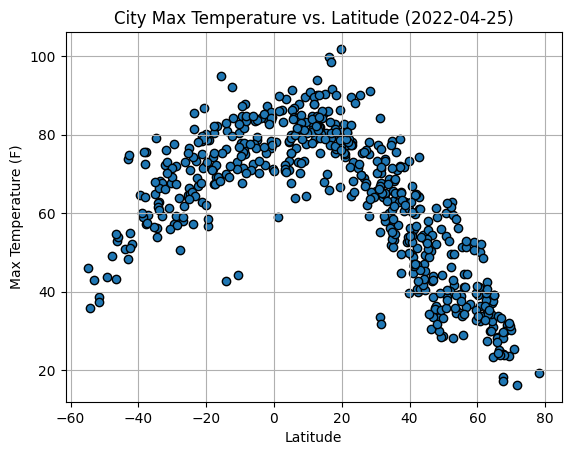

In [115]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature_f = city_data_df['Max Temp']

fig1, ax1 = plt.subplots()
ax1.scatter(latitude, temperature_f, edgecolors='black')

# Incorporate the other graph properties
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Max Temperature (F)')
ax1.set_title('City Max Temperature vs. Latitude (2022-04-25)')
ax1.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

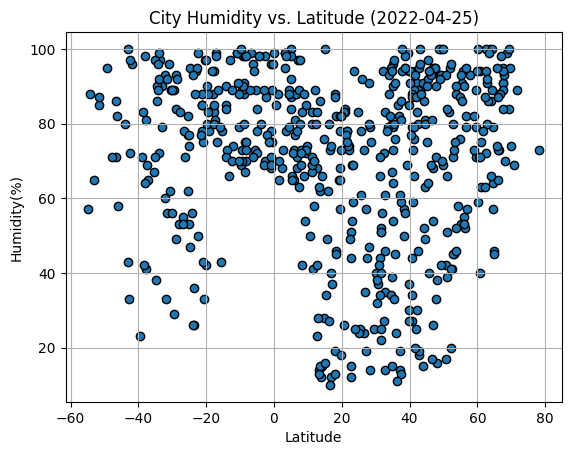

In [116]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']

fig2, ax2 = plt.subplots()
ax2.scatter(latitude, humidity, edgecolors='black')

# Incorporate the other graph properties
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Humidity(%)')
ax2.set_title('City Humidity vs. Latitude (2022-04-25)')
ax2.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

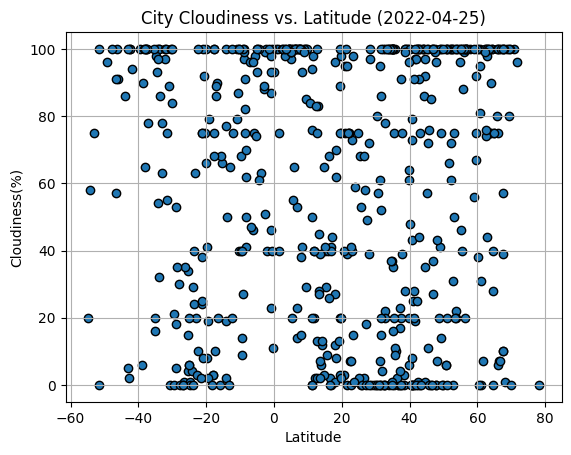

In [117]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']

fig3, ax3 = plt.subplots()
ax3.scatter(latitude, cloudiness, edgecolors='black')

# Incorporate the other graph properties
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Cloudiness(%)')
ax3.set_title('City Cloudiness vs. Latitude (2022-04-25)')
ax3.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

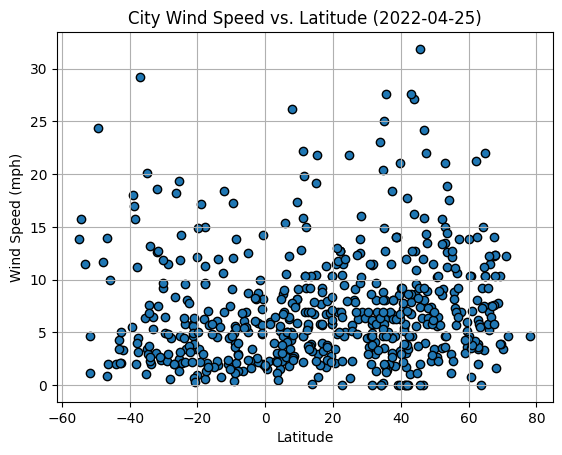

In [118]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']

fig4, ax4 = plt.subplots()
ax4.scatter(latitude, wind_speed, edgecolors='black')

# Incorporate the other graph properties
ax4.set_xlabel('Latitude')
ax4.set_ylabel('Wind Speed (mph)')
ax4.set_title('City Wind Speed vs. Latitude (2022-04-25)')
ax4.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [130]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x,y,x_title,y_title,plot_title,annotation_position):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.subplots()
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(plot_title)
    plt.scatter(x, y, edgecolors='black')
    plt.grid(True)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,annotation_position,fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [120]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
northern_lat = northern_hemi_df['Lat']
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,suez,29.9737,32.5263,65.75,40,0,4.43,EG,1682482640
1,iqaluit,63.7506,-68.5145,29.93,100,75,0.00,CA,1682482640
2,aasiaat,68.7098,-52.8699,31.62,99,100,7.74,GL,1682482640
3,dryden,49.7833,-92.7503,28.69,69,0,3.44,CA,1682482640
4,wailua homesteads,22.0669,-159.3780,77.43,74,75,12.66,US,1682482641


In [121]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
southern_lat = southern_hemi_df['Lat']
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,invercargill,-46.4000,168.3500,53.02,82,100,1.99,NZ,1682482641
9,adamstown,-25.0660,-130.1015,76.62,74,6,11.81,PN,1682482641
11,grytviken,-54.2811,-36.5092,35.85,88,58,15.79,GS,1682482642
12,edinburgh of the seven seas,-37.0676,-12.3116,59.40,65,78,29.19,SH,1682482642
14,port-aux-francais,-49.3500,70.2167,43.72,95,96,24.34,TF,1682482642


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7808491639611739


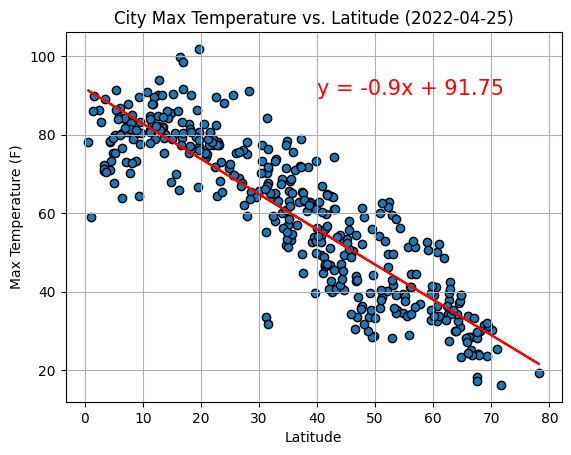

In [131]:
# Linear regression on Northern Hemisphere
northern_temp = northern_hemi_df['Max Temp']
plot_linear_regression(northern_lat,northern_temp,x_title='Latitude',y_title='Max Temperature (F)',plot_title='City Max Temperature vs. Latitude (2022-04-25)',annotation_position=(40.0,90.0))

The r-squared is: 0.5174507943854298


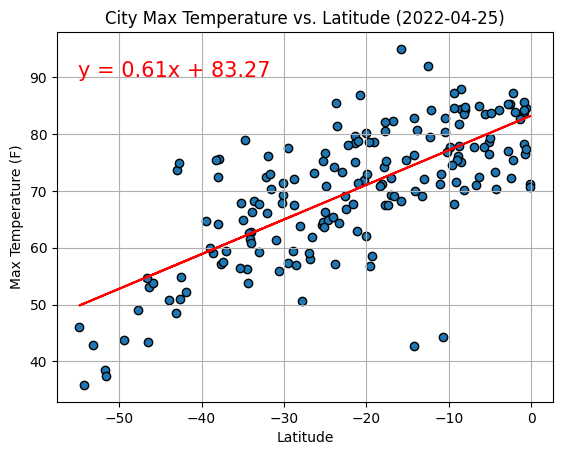

In [123]:
# Linear regression on Southern Hemisphere
southern_temp = southern_hemi_df['Max Temp']
plot_linear_regression(southern_lat,southern_temp,x_title='Latitude',y_title='Max Temperature (F)',plot_title='City Max Temperature vs. Latitude (2022-04-25)',annotation_position=(-55.0,90.0))

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and max temperature in the northern hemisphere.  There is a weaker positive correlation between latitude and max temperature in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.02570545430150041


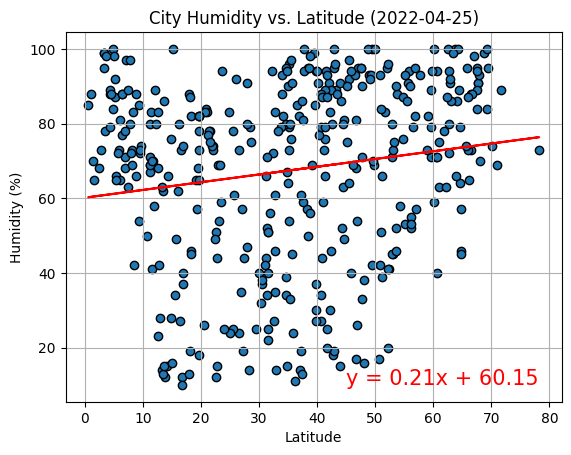

In [124]:
# Northern Hemisphere
northern_humidity = northern_hemi_df['Humidity']
plot_linear_regression(northern_lat,northern_humidity,x_title='Latitude',y_title='Humidity (%)',plot_title='City Humidity vs. Latitude (2022-04-25)',annotation_position=(45.0,10.0))


The r-squared is: 0.04238190520252186


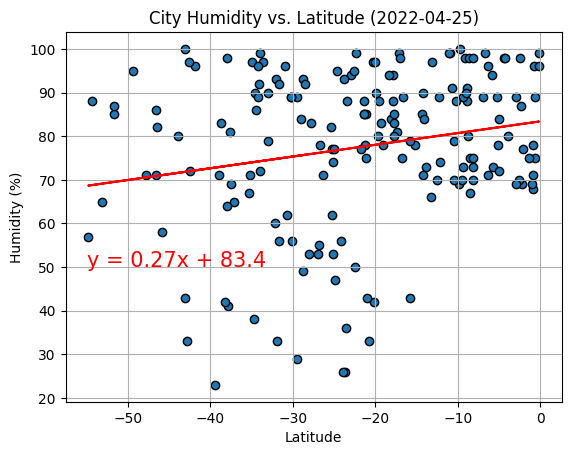

In [134]:
# Southern Hemisphere
southern_humidity = southern_hemi_df['Humidity']
plot_linear_regression(southern_lat,southern_humidity,x_title='Latitude',y_title='Humidity (%)',plot_title='City Humidity vs. Latitude (2022-04-25)',annotation_position=(-55.0,50.0))

**Discussion about the linear relationship:** There is no correlation between latitude and humidity in the northern or southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0025394018037209667


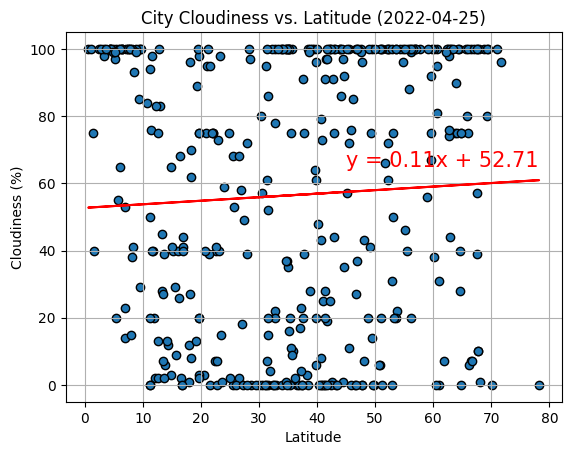

In [135]:
# Northern Hemisphere
northern_clouds = northern_hemi_df['Cloudiness']
plot_linear_regression(northern_lat,northern_clouds,x_title='Latitude',y_title='Cloudiness (%)',plot_title='City Cloudiness vs. Latitude (2022-04-25)',annotation_position=(45.0,65.0))

The r-squared is: 0.0007370314825496851


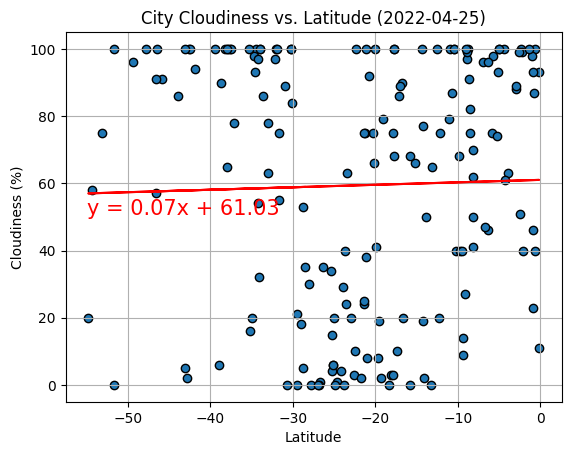

In [137]:
# Southern Hemisphere
southern_clouds = southern_hemi_df['Cloudiness']
plot_linear_regression(southern_lat,southern_clouds,x_title='Latitude',y_title='Cloudiness (%)',plot_title='City Cloudiness vs. Latitude (2022-04-25)',annotation_position=(-55.0,50.5))

**Discussion about the linear relationship:** There is no correlation between latitude and cloudiness in the northern or southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.011161063963319996


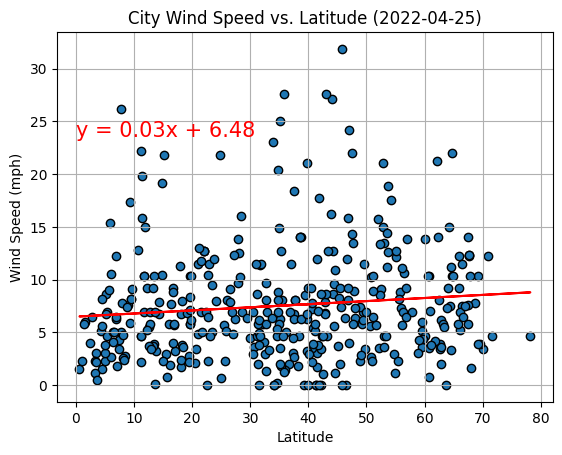

In [128]:
# Northern Hemisphere
northern_wind_speed = northern_hemi_df['Wind Speed']
plot_linear_regression(northern_lat,northern_wind_speed,x_title='Latitude',y_title='Wind Speed (mph)',plot_title='City Wind Speed vs. Latitude (2022-04-25)',annotation_position=(0.0,23.5))

The r-squared is: 0.034312120422012184


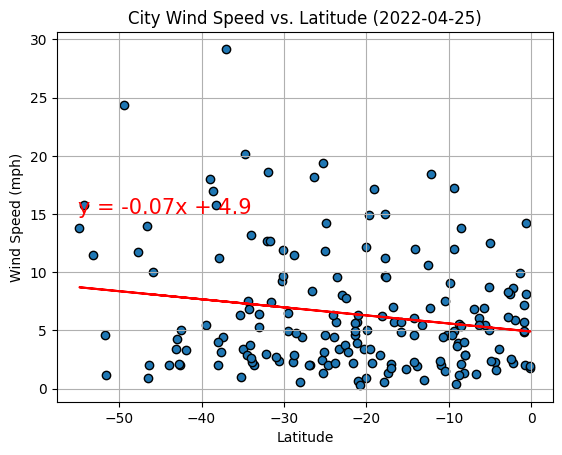

In [129]:
# Southern Hemisphere
southern_wind_speed = southern_hemi_df['Wind Speed']
plot_linear_regression(southern_lat,southern_wind_speed,x_title='Latitude',y_title='Wind Speed (mph)',plot_title='City Wind Speed vs. Latitude (2022-04-25)',annotation_position=(-55.0,15.0))

**Discussion about the linear relationship:** There is no correlation between latitude and wind speed in the northern or southern hemisphere.